In [1]:
import pandas as pd
import numpy as np

# Loading Up the Splitwise Data

In [2]:
splitwiseData = pd.read_csv('splitwise_reviews.csv')

## Viewing a few rows of the data

In [3]:
splitwiseData.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8ef0c973-1bc2-4760-8900-d9961a67dacf,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"Great app(!), annoying push to try get you to ...",4,0,24.11.1,2024-12-11 15:39:05,NaN,NaN,24.11.1
1,0be8e59c-d135-4147-8fc4-37381d583636,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"I love it, I will buy the premium version.",5,0,24.11.1,2024-12-11 14:28:51,NaN,NaN,24.11.1
2,98159b43-dff5-4e1e-aa85-682133aae9a8,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,It does not make sense to be paying the same a...,1,0,23.4.1,2024-12-11 13:59:58,NaN,NaN,23.4.1
3,bfaf5cb7-ad92-449c-94ee-c4106d35ef15,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,Turned a successful free app into a shameless ...,1,0,24.11.1,2024-12-11 13:24:07,NaN,NaN,24.11.1
4,54217d7e-7409-434a-9c8f-4457596b5cec,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,The best app to record and manage your joint e...,5,0,24.11.1,2024-12-11 13:16:44,NaN,NaN,24.11.1


In [4]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Filter for positive reviews
positive_reviews = splitwiseData[splitwiseData['score'] >= 4]['content'].dropna()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize
    words = word_tokenize(text)
    # Remove stopwords and non-alphabetic tokens
    sw = set(stopwords.words('english'))
    words = [w for w in words if w.isalpha() and w not in sw]
    return words

# Clean the text of positive reviews
positive_reviews_tokens = positive_reviews.apply(clean_text)

# Flatten list of tokens
all_tokens = [word for tokens in positive_reviews_tokens for word in tokens]



C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

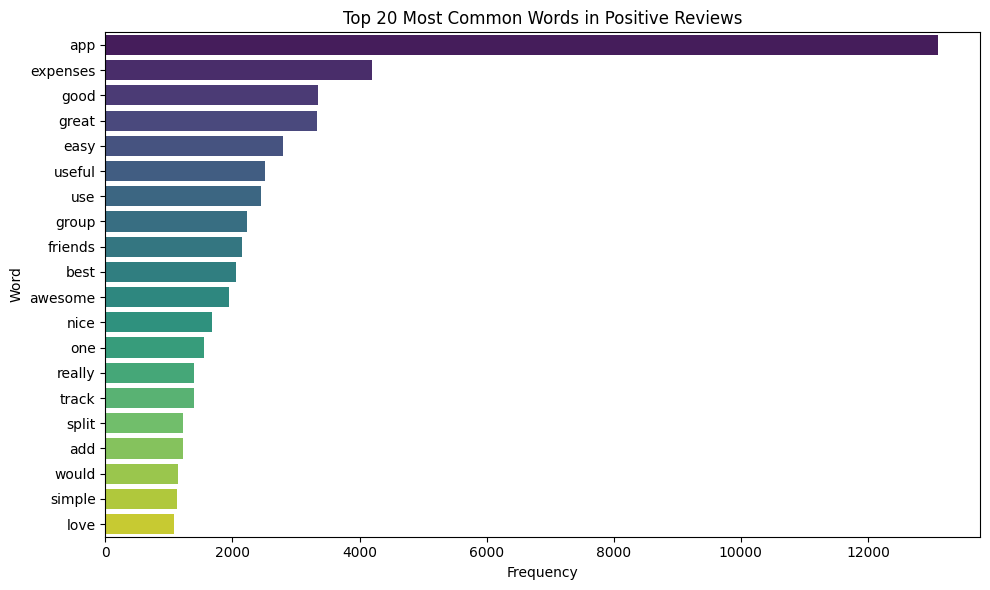

In [5]:
### 1. Bar Chart of Most Common Words in Positive Reviews ###
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(20)

words, counts = zip(*most_common_words)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette='viridis')
plt.title("Top 20 Most Common Words in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and wil

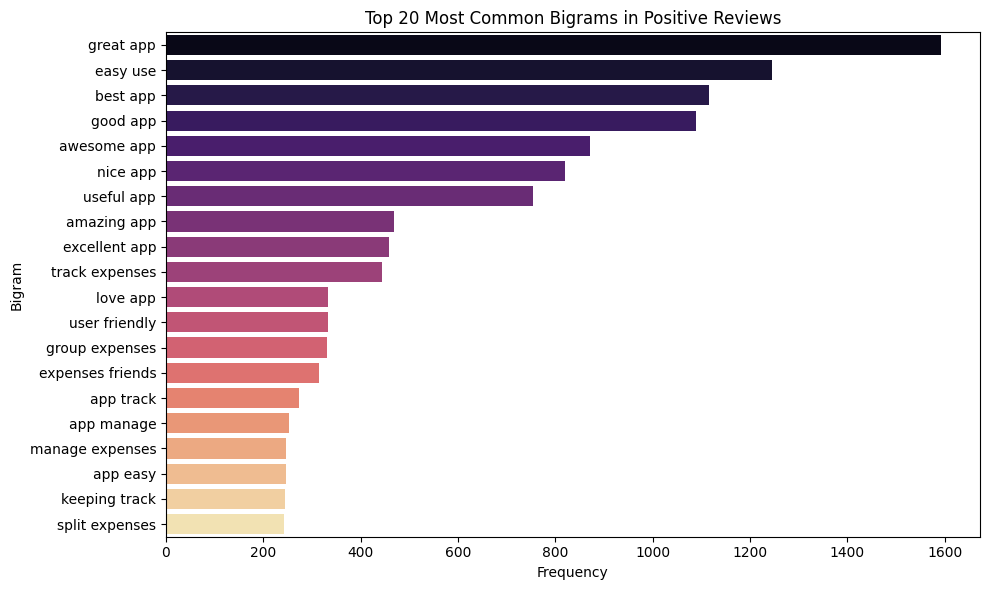

In [6]:
### 2. Bar Chart of Most Common N-grams (e.g., Bigrams) ###
vectorizer = CountVectorizer(ngram_range=(2,2), stop_words='english')
ngram_matrix = vectorizer.fit_transform(positive_reviews)
ngram_freq = ngram_matrix.sum(axis=0)
ngram_freq = [(word, ngram_freq[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)
top_ngrams = ngram_freq[:20]

ngram_words, ngram_counts = zip(*top_ngrams)
plt.figure(figsize=(10,6))
sns.barplot(x=list(ngram_counts), y=list(ngram_words), palette='magma')
plt.title("Top 20 Most Common Bigrams in Positive Reviews")
plt.xlabel("Frequency")
plt.ylabel("Bigram")
plt.tight_layout()
plt.show()

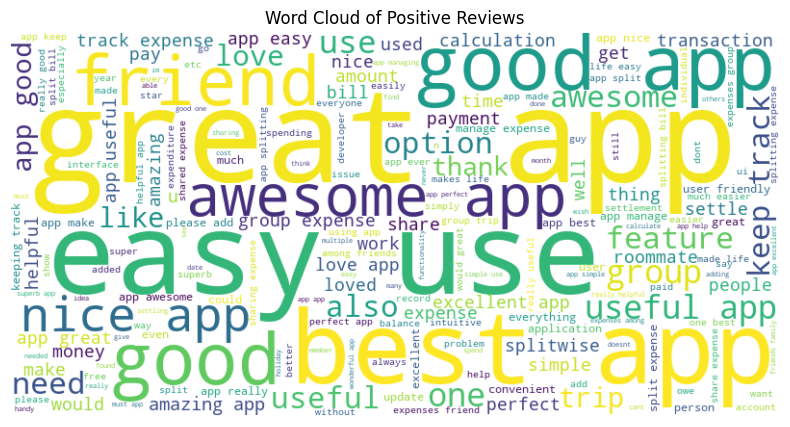

In [7]:
### 3. Word Cloud of Most Frequent Words ###
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords.words('english'))
wordcloud.generate(" ".join(all_tokens))

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


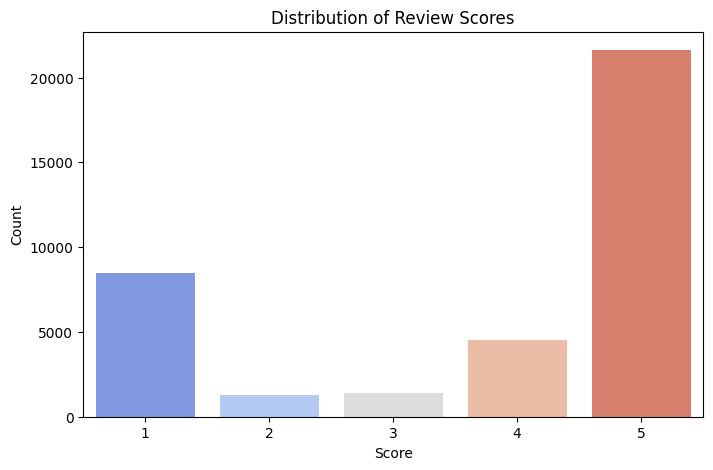

In [8]:
# - Distribution chart of review scores
plt.figure(figsize=(8,5))
sns.countplot(x='score', data=splitwiseData, palette='coolwarm')
plt.title("Distribution of Review Scores")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


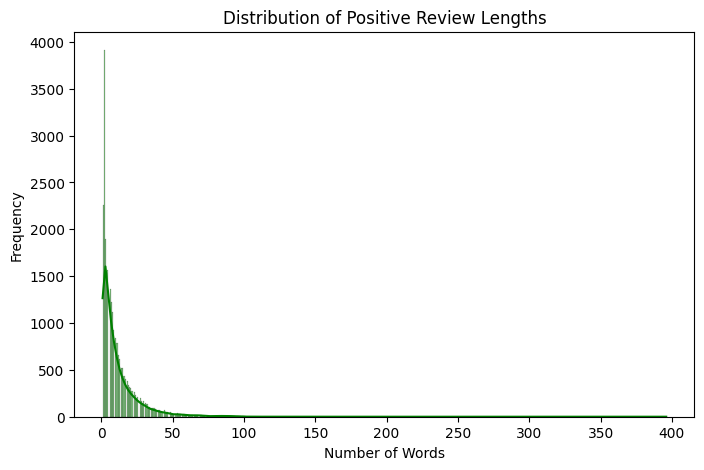

In [9]:
# - Length of reviews as histogram
positive_lengths = positive_reviews.apply(lambda x: len(x.split()))
plt.figure(figsize=(8,5))
sns.histplot(positive_lengths, kde=True, color='green')
plt.title("Distribution of Positive Review Lengths")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()